In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [3]:
def read_file(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(file, sep=",")

In [4]:
df = read_file("~/Desktop/cleaned_table_final.csv")

In [5]:
df_2 = read_file("~/Desktop/stx_pt.csv")

In [6]:
df_2

,Stx,PT
0,stx2a,PT 32
1,stx2a,PT 2
2,stx2a,PT 8
3,stx2c stx1a,PT 8
4,stx2a stx2c stx1a,PT 8
...,...,...
2720,stx1a stx2c,PT 8
2721,stx2c,PT 1
2722,stx1a stx2c,PT 8
2723,stx1a stx2c,PT 8


In [7]:
df_2.shape

(2725, 2)

In [8]:
toxins = df_2["Stx"].unique()
type(toxins)

numpy.ndarray

In [9]:
print([tox for tox in toxins.tolist() if len(tox) > 11]) # wtf, stx1a stx2a stx2c & stx2a stx2c stx1a = same

['stx2a stx2c stx1a', 'stx1a stx2a stx2c', 'stx1a stx1c stx2c', 'stx1a stx2c stx2d']


In [10]:
stx_cluster = []
for row in df_2["Stx"]:  
    if row == "stx1a stx2a stx2c":
        stx_cluster.append(row)  
    elif row == "stx2a stx2c stx1a":
        stx_cluster.append(row) 

In [11]:
len(stx_cluster)

55

In [12]:
print(f"Sum of equal toxins: {len([val for val in df["Stx"] if val == "stx1a stx2a stx2c"]) + len([val for val in df["Stx"] if val == "stx2a stx2c stx1a"])}")

Sum of equal toxins: 55


In [13]:
df_2["Stx"] = df_2["Stx"].replace("stx2a stx2c stx1a", "stx1a stx2a stx2c")

In [14]:
print(f"Fixed Stx count: {len([tox for tox in df_2["Stx"] if tox == "stx1a stx2a stx2c"])}") # all good!

Fixed Stx count: 55


In [15]:
df_2

,Stx,PT
0,stx2a,PT 32
1,stx2a,PT 2
2,stx2a,PT 8
3,stx2c stx1a,PT 8
4,stx1a stx2a stx2c,PT 8
...,...,...
2720,stx1a stx2c,PT 8
2721,stx2c,PT 1
2722,stx1a stx2c,PT 8
2723,stx1a stx2c,PT 8


In [16]:
# load up df_2 with Stx_count and PT_count from new df
# but save this df first
df.to_csv("~/Desktop/fixed_pt_stx.csv", index=False)

In [17]:
df3 = read_file("~/Desktop/stx_pt_count.csv")
df3

,Stx,Stx_Count,PT,PT_Count
0,stx1a,1,PT 1,1
1,stx1a stx2a,1,PT 1,1
2,stx1a stx2a stx2c,3,PT 1,3
3,stx2a,57,PT 1,57
4,stx2a stx1a,6,PT 1,6
...,...,...,...,...
109,stx1a stx2c,3,RDNC,3
110,stx2a,10,RDNC,10
111,stx2a stx2c,7,RDNC,7
112,stx2c,45,RDNC,45


<Figure size 1400x800 with 0 Axes>

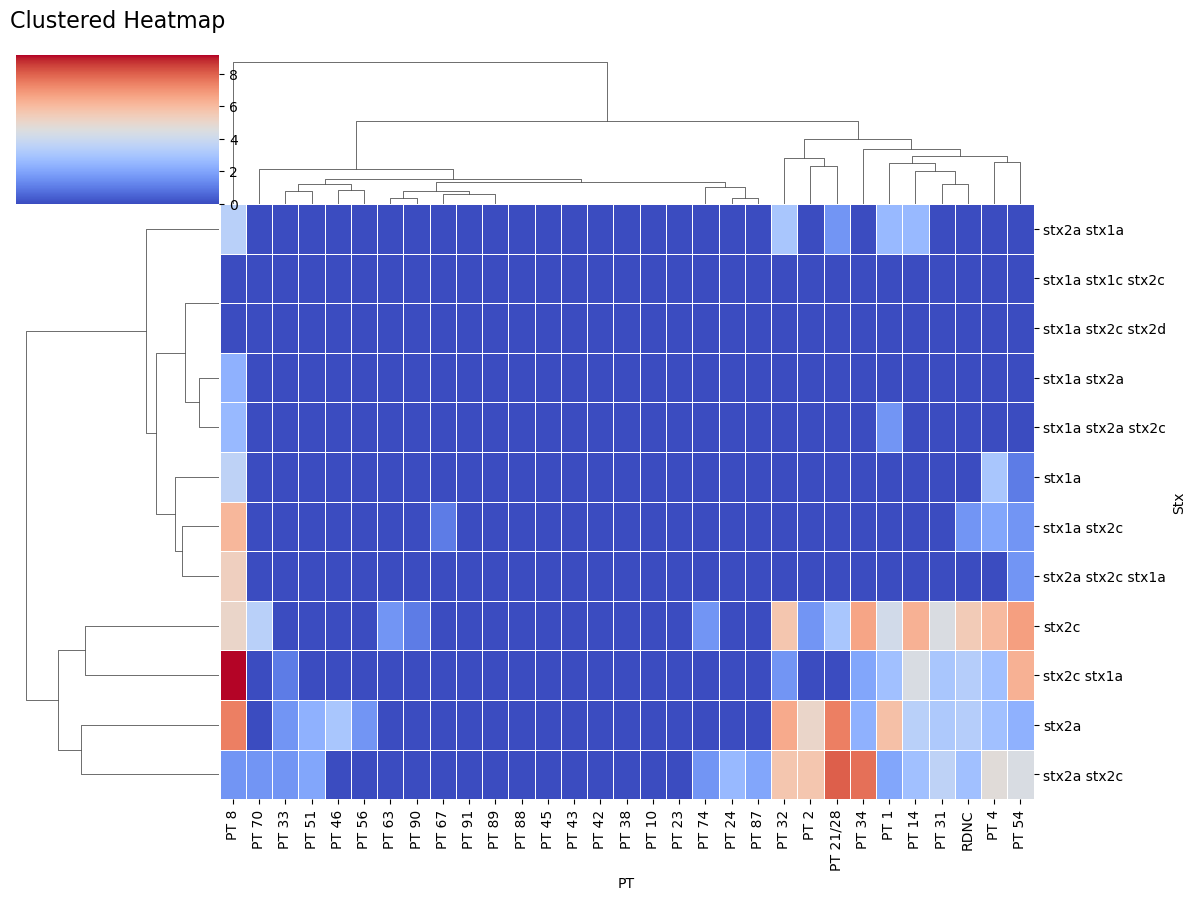

In [18]:
heatmap_data = df3.pivot_table(index="Stx", columns="PT", values="Stx_Count", aggfunc="sum", fill_value=0)
heatmap_data.replace(0, 1, inplace=True) # replace 0s with 1
heatmap_data_norm = np.log2(heatmap_data)

# Generate clustered heatmap
plt.figure(figsize=(14, 8))
sns.clustermap(
    heatmap_data_norm,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    dendrogram_ratio=(0.2, 0.2),
    cbar_pos=(0.9, 0.2, 0.03, 0.4),
    figsize=(12, 10),
    method="average",
    metric="euclidean"
)

plt.title("Clustered Heatmap", fontsize=16, pad=20)
plt.subplots_adjust(top=0.85)

plt.show()

In [19]:
# need to generate another df with individual Stx instead of toxin combinations

In [20]:
df3["Stx"].unique() # stx1a, stx1c, stx2a, stx2c, stx2d -> back to SQL

array(['stx1a', 'stx1a stx2a', 'stx1a stx2a stx2c', 'stx2a',
       'stx2a stx1a', 'stx2a stx2c', 'stx2c', 'stx2c stx1a',
       'stx2a stx2c stx1a', 'stx1a stx2c', 'stx1a stx1c stx2c',
       'stx1a stx2c stx2d'], dtype=object)

In [21]:
# store those 4 in a dictionary
toxins = {"stx1a": 0, "stx1c": 0, "stx2a": 0, "stx2c": 0, "stx2d": 0}

for tox in df_2["Stx"]:
    if tox in toxins:
        toxins[tox] += 1

In [22]:
toxins # check this is correct

{'stx1a': 26, 'stx1c': 0, 'stx2a': 586, 'stx2c': 551, 'stx2d': 0}

In [23]:
# +6 new columns (1 per Stx) and 0 or 1 if present # fix stx

In [24]:
# manipulate original df
print(f"Unique countries: {df["Country"].unique()}") # N = "UK" - WTF (Wales) - need to sum that to N - Fix Portugal
print(f"Unique regions: {df["Region"].unique()}") # all good 

Unique countries: ['N' 'Turkey' 'Cyprus' 'France' 'Portugal' 'Spain' 'Guernsey' 'Ireland'
 'India' 'Morocco' 'Egypt' 'Denmark' 'St Vincent and the Grenadines' 'UAE'
 'Italy' 'Vietnam' 'Qatar' 'Ghana' 'Greece' 'Tanzania' 'Poland' 'Croatia'
 'Belgium' 'Indonesia' 'Bangladesh' 'Bulgaria' 'Maldives' 'Thailand'
 'Israel' 'Cape Verde' 'Azerbaijan' 'Pakistan' 'Cuba' 'Albania'
 'New Zealand' 'USA' 'Serbia' 'Mexico' 'South Africa' 'Czech Republic'
 'Malta' 'Jordan' 'Nigeria' 'Madagascar' 'Hungary' 'Peru' 'Iran' 'Kenya'
 'Algeria' 'Austria' 'China' 'Puerto Rico' 'Romania' 'Saudi Arabia'
 'Wales' 'Barbados' 'Saudia Arabia' 'Philipines' 'Argentina'
 'Dominican Republic' 'Canada' 'Faroe Islands' 'Jamaica' 'Tunisia'
 'Germany' 'Japan' 'Australia' 'Bhutan' 'Uganda' 'Switzerland' 'Antigua'
 'Holland' 'Slovakia']
Unique regions: ['UK' 'M. East' 'S. Europe' 'C. Europe' 'Asia' 'N. Africa' 'N. Europe'
 'C. America' 'Subsaharan Africa' 'Australasia' 'N. America' 'S. America']


In [25]:
df4 = read_file("~/Desktop/BH_analysis/final_df.csv") # final cleaned dataset # need to redo the bar charts based on this
df4.shape

(2727, 6)

In [26]:
df4

,Accession,Country,Region,Year,Stx,PT
0,SRR8114780,India,Asia,2018,stx2c,PT 54
1,SRR10054528,Indonesia,Asia,2019,stx2c,PT 14
2,SRR7286555,Indonesia,Asia,2017,stx2c,PT 14
3,SRR7286247,Indonesia,Asia,2018,stx2c,PT 14
4,SRR7285477,Philipines,Asia,2016,stx2a stx2c,PT 34
...,...,...,...,...,...,...
2722,SRR9973676,UK,UK,2019,stx1a stx2c,PT 8
2723,SRR3530616,UK,UK,2015,stx2a,PT 8
2724,SRR9973702,UK,UK,2019,stx1a stx2c,PT 8
2725,SRR3530530,UK,UK,2015,stx2a,PT 2


In [27]:
df4["Country"].unique()

array(['India', 'Indonesia', 'Philipines', 'Pakistan', 'China', 'Vietnam',
       'Bangladesh', 'Bhutan', 'Japan', 'Thailand', 'Maldives',
       'Australia', 'New Zealand', 'Antigua', 'Mexico', 'Cuba',
       'Dominican Republic', 'Jamaica', 'St Vincent and the Grenadines',
       'Barbados', 'France', 'Puerto Rico', 'Belgium', 'Czech Republic',
       'Ireland', 'Holland', 'Hungary', 'Guernsey', 'Germany', 'Serbia',
       'Austria', 'Slovakia', 'Switzerland', 'Romania', 'Israel',
       'Turkey', 'UAE', 'Saudia Arabia', 'Saudi Arabia', 'Qatar',
       'Jordan', 'Iran', 'Azerbaijan', 'Morocco', 'Cape Verde', 'Egypt',
       'Tunisia', 'Algeria', 'USA', 'Canada', 'Poland', 'Denmark',
       'Faroe Islands', 'Argentina', 'Peru', 'Spain', 'Portugal',
       'Cyprus', 'Italy', 'Croatia', 'Bulgaria', 'Greece', 'Malta',
       'Albania', 'Nigeria', 'Kenya', 'South Africa', 'Tanzania',
       'Uganda', 'Ghana', 'Madagascar', 'UK'], dtype=object)

In [28]:
df4["Region"].unique()

array(['Asia', 'Australasia', 'C. America', 'C. Europe', 'M. East',
       'N. Africa', 'N. America', 'N. Europe', 'S. America', 'S. Europe',
       'Subsaharan Africa', 'UK'], dtype=object)

In [29]:
df4["Stx"].unique()

array(['stx2c', 'stx2a stx2c', 'stx2c stx1a', 'stx2a stx1a',
       'stx1a stx2c', 'stx2a', 'stx1a', 'stx1a stx2a',
       'stx1a stx2a stx2c', 'stx1a stx1c stx2c', 'stx1a stx2c stx2d'],
      dtype=object)

In [30]:
df4["PT"].unique()

array(['PT 54', 'PT 14', 'PT 34', 'PT 31', 'PT 90', 'PT 45', 'PT 8',
       'RDNC', 'PT 4', 'PT 32', 'PT 63', 'PT 2', 'PT 33', 'PT 24',
       'PT 51', 'PT 21/28', 'PT 42', 'PT 1', 'PT 74', 'PT 70', 'PT 88',
       'PT 89', 'PT 38', 'PT 87', 'PT 23', 'PT 46', 'PT 91', 'PT 56',
       'PT 67', 'PT 10', 'PT 43'], dtype=object)

In [31]:
print(df4["Stx"][df4["Stx"].apply(lambda tox: len(str(tox)) > 11)].unique()) # all good!

['stx1a stx2a stx2c' 'stx1a stx1c stx2c' 'stx1a stx2c stx2d']


In [32]:
# need to group them by Shiga toxin type (individual)
df4.shape

(2727, 6)

In [33]:
# stx1a, stx1c, stx2a, stx2c, stx2d
df4[["Stx2a", "Stx2c", "Stx2d", "Stx1a", "Stx1c"]] = 0

for index, row in df4.iterrows():
    if "stx2a" in str(row["Stx"]):  
        df4.at[index, "Stx2a"] += 1

for index, row in df4.iterrows():
    if "stx2c" in str(row["Stx"]):  
        df4.at[index, "Stx2c"] += 1

for index, row in df4.iterrows():
    if "stx2d" in str(row["Stx"]):  
        df4.at[index, "Stx2d"] += 1

for index, row in df4.iterrows():
    if "stx1a" in str(row["Stx"]):  
        df4.at[index, "Stx1a"] += 1

for index, row in df4.iterrows():
    if "stx1c" in str(row["Stx"]):  
        df4.at[index, "Stx1c"] += 1

df4

,Accession,Country,Region,Year,Stx,PT,Stx2a,Stx2c,Stx2d,Stx1a,Stx1c
0,SRR8114780,India,Asia,2018,stx2c,PT 54,0,1,0,0,0
1,SRR10054528,Indonesia,Asia,2019,stx2c,PT 14,0,1,0,0,0
2,SRR7286555,Indonesia,Asia,2017,stx2c,PT 14,0,1,0,0,0
3,SRR7286247,Indonesia,Asia,2018,stx2c,PT 14,0,1,0,0,0
4,SRR7285477,Philipines,Asia,2016,stx2a stx2c,PT 34,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2722,SRR9973676,UK,UK,2019,stx1a stx2c,PT 8,0,1,0,1,0
2723,SRR3530616,UK,UK,2015,stx2a,PT 8,1,0,0,0,0
2724,SRR9973702,UK,UK,2019,stx1a stx2c,PT 8,0,1,0,1,0
2725,SRR3530530,UK,UK,2015,stx2a,PT 2,1,0,0,0,0


In [34]:
df4

,Accession,Country,Region,Year,Stx,PT,Stx2a,Stx2c,Stx2d,Stx1a,Stx1c
0,SRR8114780,India,Asia,2018,stx2c,PT 54,0,1,0,0,0
1,SRR10054528,Indonesia,Asia,2019,stx2c,PT 14,0,1,0,0,0
2,SRR7286555,Indonesia,Asia,2017,stx2c,PT 14,0,1,0,0,0
3,SRR7286247,Indonesia,Asia,2018,stx2c,PT 14,0,1,0,0,0
4,SRR7285477,Philipines,Asia,2016,stx2a stx2c,PT 34,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2722,SRR9973676,UK,UK,2019,stx1a stx2c,PT 8,0,1,0,1,0
2723,SRR3530616,UK,UK,2015,stx2a,PT 8,1,0,0,0,0
2724,SRR9973702,UK,UK,2019,stx1a stx2c,PT 8,0,1,0,1,0
2725,SRR3530530,UK,UK,2015,stx2a,PT 2,1,0,0,0,0


In [35]:
df4.to_csv("stx_pt_cluster.csv", index=False) 

In [36]:
df_new = read_file("~/Desktop/BH_analysis/stx_pt_merge.csv")

In [37]:
df_new

,Stx1a,Stx1c,Stx2a,Stx2c,Stx2d,PT
0,0,0,0,1,0,PT 54
1,0,0,0,1,0,PT 14
2,0,0,0,1,0,PT 14
3,0,0,0,1,0,PT 14
4,0,0,1,1,0,PT 34
...,...,...,...,...,...,...
2722,1,0,0,1,0,PT 8
2723,0,0,1,0,0,PT 8
2724,1,0,0,1,0,PT 8
2725,0,0,1,0,0,PT 2


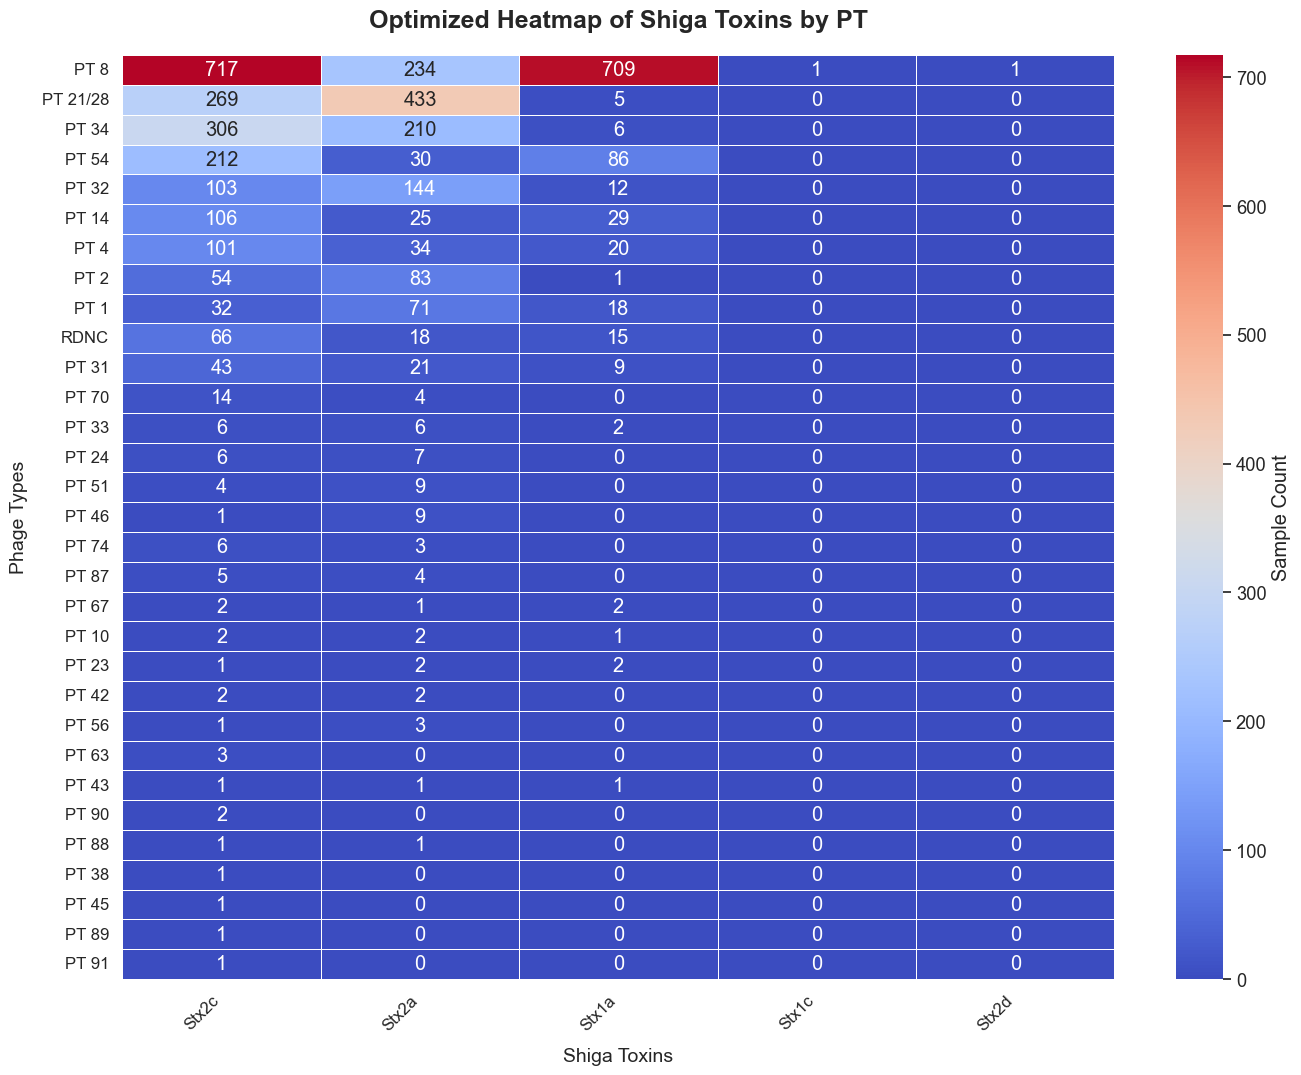

In [38]:
df_grouped = df_new.groupby("PT", observed=False).sum()
df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index, df_grouped.sum(axis=0).sort_values(ascending=False).index]

plt.figure(figsize=(16, 12))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

g = sns.heatmap(
    df_grouped,
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,
    fmt=".0f",
    cbar_kws={"label": "Sample Count"},
    xticklabels=True,
    yticklabels=True
)

plt.title("Optimized Heatmap of Shiga Toxins by PT", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Shiga Toxins", fontsize=14, labelpad=10)
plt.ylabel("Phage Types", fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()

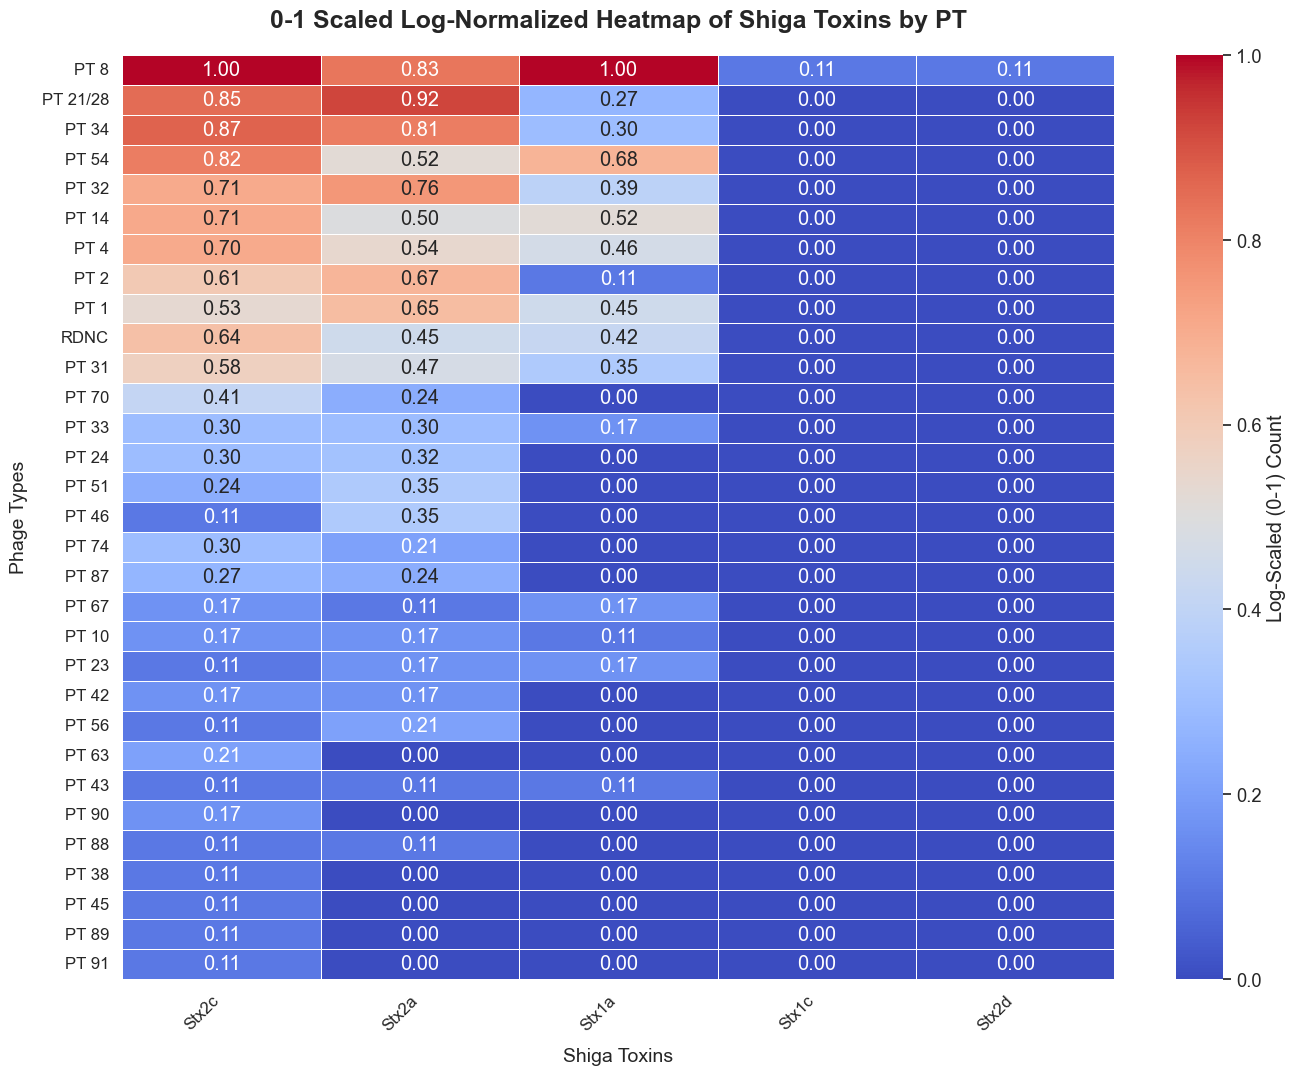

In [39]:
df_log_scaled = np.log1p(df_grouped)
df_log_scaled = (df_log_scaled - df_log_scaled.min().min()) / (df_log_scaled.max().max() - df_log_scaled.min().min())

plt.figure(figsize=(16, 12))
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

g = sns.heatmap(
    df_log_scaled,
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,
    fmt='.2f', 
    cbar_kws={'label': 'Log-Scaled (0-1) Count'},
    xticklabels=True,
    yticklabels=True
)

plt.title("0-1 Scaled Log-Normalized Heatmap of Shiga Toxins by PT", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Shiga Toxins", fontsize=14, labelpad=10)
plt.ylabel("Phage Types", fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [40]:
reg_df = df4[["Region", "Stx1a", "Stx1c", "Stx2a", "Stx2c", "Stx2d"]]
reg_df = pd.DataFrame(reg_df)
reg_df.to_csv("region_stx_cluster.csv", index=False)

In [41]:
ctr_df = df4[["Country", "Stx1a", "Stx1c", "Stx2a", "Stx2c", "Stx2d"]]
ctr_df = pd.DataFrame(ctr_df)
ctr_df.to_csv("country_stx_cluster.csv", index=False)

In [42]:
print(df4["Stx"].unique()) # the same with stx1a stx2c

['stx2c' 'stx2a stx2c' 'stx2c stx1a' 'stx2a stx1a' 'stx1a stx2c' 'stx2a'
 'stx1a' 'stx1a stx2a' 'stx1a stx2a stx2c' 'stx1a stx1c stx2c'
 'stx1a stx2c stx2d']


In [43]:
metadata = read_file("~/Desktop/XX50235metadata.csv")
print(len([val for val in metadata["Region"] if val == "UK"])) # 2174
print(len([val for val in metadata["Country"] if val == "N"])) # 2172 # Wales problem only on Country

2174
2172


In [44]:
((len([val for val in metadata["Country"] if val == "N"])) / len(metadata["Country"]) * 100)
country_dict = {i: 0 for i in df["Country"].unique()}
for index, row in metadata.iterrows():
    country = row["Country"]  
    if country in country_dict:
        country_dict[country] += 1

In [45]:
country_dict

{'N': 2172,
 'Turkey': 121,
 'Cyprus': 30,
 'France': 22,
 'Portugal': 24,
 'Spain': 112,
 'Guernsey': 1,
 'Ireland': 12,
 'India': 15,
 'Morocco': 37,
 'Egypt': 34,
 'Denmark': 4,
 'St Vincent and the Grenadines': 1,
 'UAE': 12,
 'Italy': 22,
 'Vietnam': 1,
 'Qatar': 2,
 'Ghana': 2,
 'Greece': 25,
 'Tanzania': 7,
 'Poland': 13,
 'Croatia': 4,
 'Belgium': 5,
 'Indonesia': 14,
 'Bangladesh': 4,
 'Bulgaria': 6,
 'Maldives': 1,
 'Thailand': 3,
 'Israel': 12,
 'Cape Verde': 9,
 'Azerbaijan': 4,
 'Pakistan': 10,
 'Cuba': 6,
 'Albania': 4,
 'New Zealand': 3,
 'USA': 11,
 'Serbia': 3,
 'Mexico': 14,
 'South Africa': 3,
 'Czech Republic': 2,
 'Malta': 8,
 'Jordan': 1,
 'Nigeria': 2,
 'Madagascar': 1,
 'Hungary': 5,
 'Peru': 2,
 'Iran': 2,
 'Kenya': 10,
 'Algeria': 4,
 'Austria': 1,
 'China': 3,
 'Puerto Rico': 1,
 'Romania': 4,
 'Saudi Arabia': 2,
 'Wales': 2,
 'Barbados': 1,
 'Saudia Arabia': 1,
 'Philipines': 1,
 'Argentina': 1,
 'Dominican Republic': 1,
 'Canada': 1,
 'Faroe Islands': 1,
 '

In [46]:
# compute SD for all classes
# region
region_dict = {i: 0 for i in metadata["Region"].unique()}
for index, row in metadata.iterrows():
    region = row["Region"]  
    if region in region_dict:
        region_dict[region] += 1

In [47]:
region_dict

{'UK': 2174,
 'M. East': 157,
 'S. Europe': 237,
 'C. Europe': 62,
 'Asia': 57,
 'N. Africa': 91,
 'N. Europe': 18,
 'C. America': 29,
 'Subsaharan Africa': 28,
 'Australasia': 6,
 'N. America': 12,
 'S. America': 3}

In [48]:
# now compute SD
print(statistics.stdev(region_dict.values()))

613.2093665891995


In [49]:
stx_dict = {i: 0 for i in metadata["Stx"].unique()}
pt_dict = {i: 0 for i in metadata["PT"].unique()}

for index, row in metadata.iterrows():
    stx = row["Stx"]
    if stx in stx_dict:
        stx_dict[stx] += 1

In [50]:
for index, row in metadata.iterrows():
    pt = row["PT"]
    if pt in pt_dict:
        pt_dict[pt] += 1

In [51]:
pt_dict

{' PT 32': 202,
 ' PT 2': 87,
 ' PT 8': 943,
 ' PT 21/28': 442,
 nan: 11,
 ' PT 34': 326,
 ' PT 54': 246,
 ' PT 4': 118,
 ' PT 31': 55,
 ' PT 14': 130,
 ' PT 33': 9,
 ' RDNC': 85,
 ' PT 1': 130,
 ' PT 24': 7,
 ' PT 46': 9,
 ' PT 51': 10,
 ' PT 56': 4,
 ' PT 90': 2,
 ' PT 70': 15,
 ' PT 87': 5,
 ' PT 42': 3,
 ' PT 38': 1,
 ' untypable': 11,
 ' PT 74': 6,
 ' PT 88': 2,
 ' PT 23': 3,
 ' PT 91': 1,
 ' PT 67': 3,
 ' PT 63': 3,
 ' PT 10': 2,
 ' PT 43': 1,
 ' PT 45': 1,
 ' PT 89': 1}

In [52]:
print(f"SD Region = {statistics.stdev(region_dict.values())} SD Country = {statistics.stdev(country_dict.values())}, SD Stx = {statistics.stdev(stx_dict.values())}, SD PT = {statistics.stdev(pt_dict.values())}")

SD Region = 613.2093665891995 SD Country = 253.85121827516784, SD Stx = 283.7177439670601, SD PT = 186.1082285318753


In [53]:
print(f"Mean Region: {statistics.mean(region_dict.values())}, Mean Country: {statistics.mean(country_dict.values())}, Stx Mean: {statistics.mean(stx_dict.values())}, PT Mean: {statistics.mean(pt_dict.values())}")

Mean Region: 239.5, Mean Country: 39.31506849315068, Stx Mean: 205.28571428571428, PT Mean: 87.0909090909091


In [54]:
met_dict = {i: 0 for i in metadata["Region"].unique()}

for index, row in metadata.iterrows():
    region = row["Region"]
    if region in met_dict:
        met_dict[region] += 1

In [55]:
met_dict

{'UK': 2174,
 'M. East': 157,
 'S. Europe': 237,
 'C. Europe': 62,
 'Asia': 57,
 'N. Africa': 91,
 'N. Europe': 18,
 'C. America': 29,
 'Subsaharan Africa': 28,
 'Australasia': 6,
 'N. America': 12,
 'S. America': 3}

In [56]:
print(sum(metadata["Country"] == "Wales"), sum(metadata["Country"] == "N"))

2 2172


In [57]:
metadata["Stx"].unique()

array([' stx2a', ' stx2c stx1a', ' stx2a stx2c stx1a', ' stx2a stx2c',
       ' stx2c', ' stx2a stx1a', ' -', ' stx1a', nan, ' stx1a stx2c',
       ' stx1a stx2a stx2c', ' stx1a stx2a', ' stx1a stx1c stx2c',
       ' stx1a stx2c stx2d'], dtype=object)

In [58]:
print(f" _ frequency: {sum(metadata["Stx"] == " -")}, NA frequency: {sum(metadata["Stx"].isna())}")

 _ frequency: 67, NA frequency: 62


In [59]:
metadata["PT"].unique()

array([' PT 32', ' PT 2', ' PT 8', ' PT 21/28', nan, ' PT 34', ' PT 54',
       ' PT 4', ' PT 31', ' PT 14', ' PT 33', ' RDNC', ' PT 1', ' PT 24',
       ' PT 46', ' PT 51', ' PT 56', ' PT 90', ' PT 70', ' PT 87',
       ' PT 42', ' PT 38', ' untypable', ' PT 74', ' PT 88', ' PT 23',
       ' PT 91', ' PT 67', ' PT 63', ' PT 10', ' PT 43', ' PT 45',
       ' PT 89'], dtype=object)

In [60]:
print(sum(metadata["PT"].isna()), sum(metadata["PT"] == " untypable"))

11 11


In [61]:
vals_pt = [val for key, val in pt_dict.items()]
statistics.mean(vals_pt)

87.0909090909091

In [62]:
target_regions = ["M. East", "N. Europe", "C. Europe", "S. Europe"]
filtered_data = metadata[metadata["Region"].isin(target_regions)]

In [63]:
region_country_mapping = {region: filtered_data[filtered_data["Region"] == region]["Country"].unique().tolist() for region in target_regions}
region_country_mapping

{'M. East': ['Turkey',
  'UAE',
  'Qatar',
  'Israel',
  'Azerbaijan',
  'Jordan',
  'Iran',
  'Saudi Arabia',
  'Saudia Arabia'],
 'N. Europe': ['Denmark', 'Poland', 'Faroe Islands'],
 'C. Europe': ['France',
  'Guernsey',
  'Ireland',
  'Switzerland',
  'Romania',
  'Belgium',
  'Serbia',
  'Czech Republic',
  'Hungary',
  'Austria',
  'Germany',
  'Holland',
  'Slovakia'],
 'S. Europe': ['Cyprus',
  'Portugal',
  'Spain',
  'Italy',
  'Greece',
  'Croatia',
  'Bulgaria',
  'Albania',
  'Malta',
  'Portgual']}

In [64]:
len(metadata["Stx"].unique())

14

In [65]:
stx_dict

{' stx2a': 587,
 ' stx2c stx1a': 713,
 ' stx2a stx2c stx1a': 45,
 ' stx2a stx2c': 674,
 ' stx2c': 556,
 ' stx2a stx1a': 36,
 ' -': 67,
 ' stx1a': 26,
 nan: 62,
 ' stx1a stx2c': 87,
 ' stx1a stx2a stx2c': 11,
 ' stx1a stx2a': 8,
 ' stx1a stx1c stx2c': 1,
 ' stx1a stx2c stx2d': 1}